<a href="https://colab.research.google.com/github/Yashu1406/Afame-Technologies/blob/main/Sales_data_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving ECOMM DATA.xlsx to ECOMM DATA.xlsx


In [2]:
#impoting libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [3]:
# Load the dataset
sales_data = pd.read_excel('ECOMM DATA.xlsx')
print(sales_data.head())
print(sales_data.info())

   Row ID         Order ID Order Date  Ship Date     Ship Mode Customer ID  \
0   32298   CA-2012-124891 2012-07-31 2012-07-31      Same Day    RH-19495   
1   26341    IN-2013-77878 2013-02-05 2013-02-07  Second Class    JR-16210   
2   25330    IN-2013-71249 2013-10-17 2013-10-18   First Class    CR-12730   
3   13524  ES-2013-1579342 2013-01-28 2013-01-30   First Class    KM-16375   
4   47221     SG-2013-4320 2013-11-05 2013-11-06      Same Day     RH-9495   

      Customer Name      Segment           City            State  ...  \
0       Rick Hansen     Consumer  New York City         New York  ...   
1     Justin Ritter    Corporate     Wollongong  New South Wales  ...   
2      Craig Reiter     Consumer       Brisbane       Queensland  ...   
3  Katherine Murray  Home Office         Berlin           Berlin  ...   
4       Rick Hansen     Consumer          Dakar            Dakar  ...   

         Product ID    Category Sub-Category  \
0   TEC-AC-10003033  Technology  Accessories

In [4]:
# Compute total sales
total_sales = sales_data['Sales'].sum()
print("Total Sales: ${:,.2f}".format(total_sales))

Total Sales: $12,642,501.91


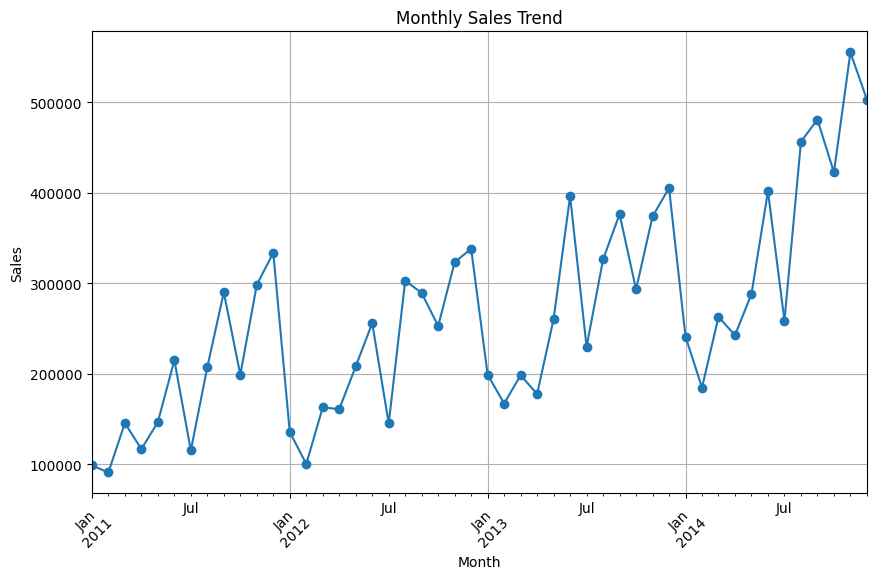

In [5]:
# Analyze sales trends over time
sales_data['Order Date'] = pd.to_datetime(sales_data['Order Date'])
monthly_sales = sales_data.resample('M', on='Order Date')['Sales'].sum()
plt.figure(figsize=(10, 6))
monthly_sales.plot(title='Monthly Sales Trend', xlabel='Month', ylabel='Sales', marker='o')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [6]:
# Determine the best-selling products
best_selling_products = sales_data.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10)
print("\nBest Selling Products:")
print(best_selling_products)


Best Selling Products:
Product Name
Apple Smart Phone, Full Size                                86935.7786
Cisco Smart Phone, Full Size                                76441.5306
Motorola Smart Phone, Full Size                             73156.3030
Nokia Smart Phone, Full Size                                71904.5555
Canon imageCLASS 2200 Advanced Copier                       61599.8240
Hon Executive Leather Armchair, Adjustable                  58193.4841
Office Star Executive Leather Armchair, Adjustable          50661.6840
Harbour Creations Executive Leather Armchair, Adjustable    50121.5160
Samsung Smart Phone, Cordless                               48653.4600
Nokia Smart Phone, with Caller ID                           47877.7857
Name: Sales, dtype: float64


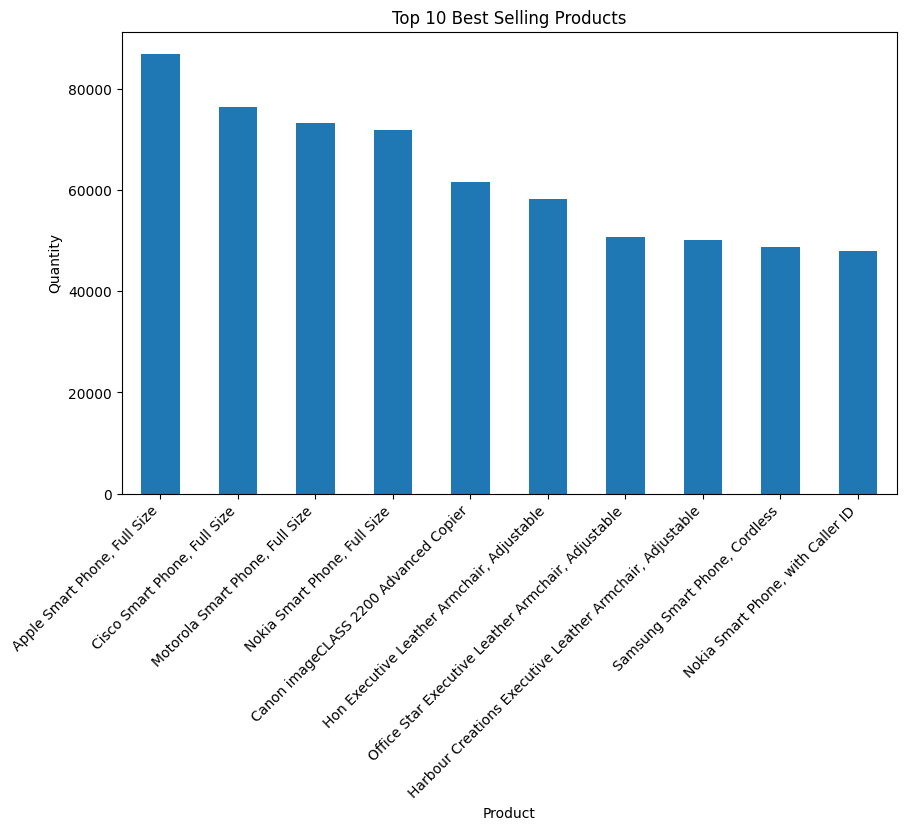

In [7]:
# Visualize best-selling products
plt.figure(figsize=(10, 6))
best_selling_products.plot(kind='bar', title='Top 10 Best Selling Products', xlabel='Product', ylabel='Quantity')
plt.xticks(rotation=45, ha='right')
plt.show()

[245.96132529 246.73018717 245.32186866 ... 245.96132529 246.54402579
 244.76338453]
Mean Squared Error: 223823.66761880906


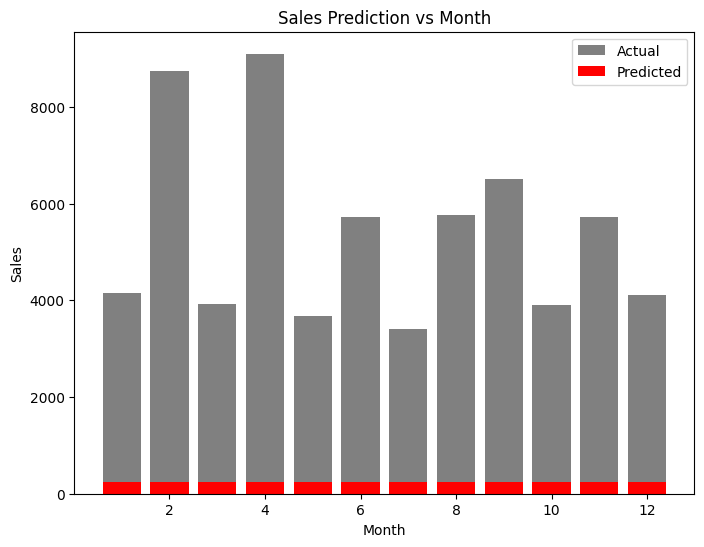

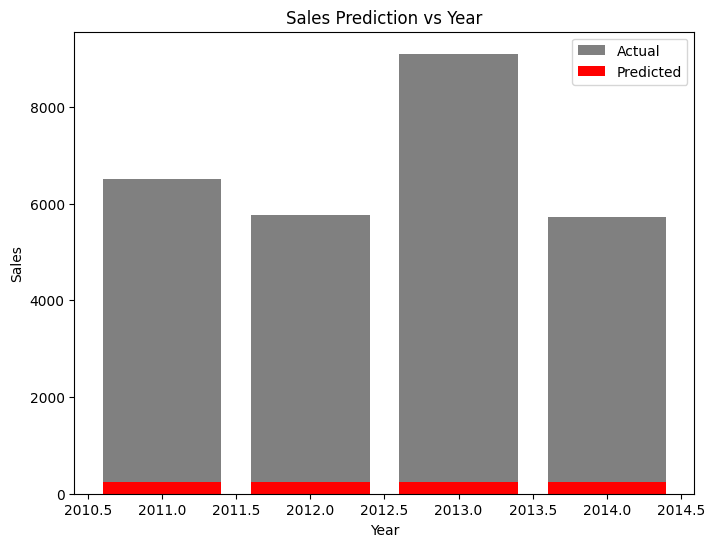

In [8]:
#feature engineering
#Extracting relevant features
sales_data['Order Date'] = pd.to_datetime(sales_data['Order Date'])
sales_data['Month'] = sales_data['Order Date'].dt.month
sales_data['Year'] = sales_data['Order Date'].dt.year

# Selecting features for prediction
X = sales_data[['Month', 'Year']]
y = sales_data['Sales']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting sales
y_pred = model.predict(X_test)
print(y_pred)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Visualizing sales data prediction for every attribute
for column in X.columns:
    plt.figure(figsize=(8, 6))
    plt.bar(X_test[column], y_test, color='gray', label='Actual')
    plt.bar(X_test[column], y_pred, color='red', label='Predicted')
    plt.xlabel(column)
    plt.ylabel('Sales')
    plt.title(f'Sales Prediction vs {column}')
    plt.legend()
    plt.show()